# Phân tích Dataset

## Load Data

In [ ]:
# packages

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# data split
from sklearn.model_selection import train_test_split

# SMOTE
from imblearn.over_sampling import SMOTE

# scaling
from sklearn.preprocessing import StandardScaler

# tune
from sklearn.model_selection import RandomizedSearchCV

# model Evaluation
from sklearn import metrics

# display HTML, Js apps
from IPython.core.display import display, HTML, Javascript

from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression

# plotly offline
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)



#Đây là hàm tải dữ liệu
def load_from_google(url):
  # Lấy id của file
  id = url.split('/')[-2]
  # Tạo link downloads:
  download_url = 'https://drive.google.com/uc?id=' + id
  # Load file từ link downloads
  data = pd.read_csv(download_url)
  return data

#Thay link tệp train và tệp test vào đây
train_url = 'https://drive.google.com/file/d/1iNpj_H3OiJLydq5wF_r75At9wZuULZ9e/view?usp=sharing'
test_url = 'https://drive.google.com/file/d/1Fuq6J2xHLVZ4BQnP22fxyPYHLh9Tvb4e/view?usp=sharing'

#Load data về
train = load_from_google(train_url)
test = load_from_google(test_url)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## Xem thông tin tệp train

In [ ]:
#Hiện tập train
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,77,Female,NaN,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,84,Male,55.0,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,91,Female,42.0,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,99,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,121,Female,38.0,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0


In [ ]:
# Xem kích thước
print('Kích thước:' ,train.shape)
print('Thông tin:' ,train.info())

Kích thước: (4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   gender             4000 non-null   object 
 2   age                3893 non-null   float64
 3   hypertension       3770 non-null   float64
 4   heart_disease      3910 non-null   float64
 5   ever_married       4000 non-null   object 
 6   work_type          4000 non-null   object 
 7   Residence_type     4000 non-null   object 
 8   avg_glucose_level  3829 non-null   float64
 9   bmi                2884 non-null   float64
 10  smoking_status     4000 non-null   object 
 11  blood              3990 non-null   object 
 12  height             2928 non-null   float64
 13  stroke             4000 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 437.6+ KB
Thông tin: None


Nhận xét:


*   Có 4000 điểm dữ liệu với cột cuối cùng là labels
*   Có các kiểu dữ liệu như float, int64, object
*   Một số cột có giá trị Null, một số thì 'Unknown'


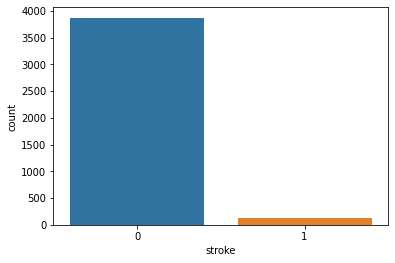

In [ ]:
# Xem tương quan dữ liệu

sns.countplot(x = 'stroke', data = train)

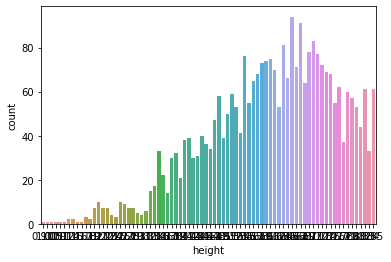

In [ ]:
sns.countplot(x = 'height', data = train)

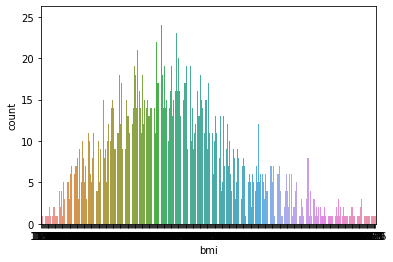

In [ ]:
sns.countplot(x = 'bmi', data = train)

Nhận xét: Dữ liệu bị mất cân bằng, phần lớn thuộc về các điểm thuộc class 0

## Xem thông tin tập test

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   gender             500 non-null    object 
 2   age                489 non-null    float64
 3   hypertension       455 non-null    float64
 4   heart_disease      366 non-null    float64
 5   ever_married       500 non-null    object 
 6   work_type          500 non-null    object 
 7   Residence_type     500 non-null    object 
 8   avg_glucose_level  494 non-null    float64
 9   bmi                457 non-null    float64
 10  smoking_status     500 non-null    object 
 11  blood              500 non-null    object 
 12  height             376 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 50.9+ KB


Nhận xét: Tập test có 500 điểm dữ liệu. Phân bố tương đồng với tập train

# Training

### Xử lý tập train

In [ ]:
# Vì nhận thấy id sẽ không ảnh hưởng đến kết quả
train = train.drop(['id'],axis = 1)
train = train.drop(['height'], axis = 1)

object_columns = [i for i in train.keys() if train[i].dtypes == object]
train = train.drop(object_columns, axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3893 non-null   float64
 1   hypertension       3770 non-null   float64
 2   heart_disease      3910 non-null   float64
 3   avg_glucose_level  3829 non-null   float64
 4   bmi                2884 non-null   float64
 5   stroke             4000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 187.6 KB


In [ ]:
train['age'].fillna(value=train['age'].mean(), inplace=True)
train['hypertension'].fillna(value=train['hypertension'].mean(), inplace=True)
train['heart_disease'].fillna(value=train['heart_disease'].mean(), inplace=True)
train['avg_glucose_level'].fillna(value=train['avg_glucose_level'].mean(), inplace=True)
train['bmi'].fillna(value=train['bmi'].mean(), inplace=True)
#train['height'].fillna(value=train['height'].mean(), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4000 non-null   float64
 1   hypertension       4000 non-null   float64
 2   heart_disease      4000 non-null   float64
 3   avg_glucose_level  4000 non-null   float64
 4   bmi                4000 non-null   float64
 5   stroke             4000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 187.6 KB


In [ ]:
train = train.dropna(axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4000 non-null   float64
 1   hypertension       4000 non-null   float64
 2   heart_disease      4000 non-null   float64
 3   avg_glucose_level  4000 non-null   float64
 4   bmi                4000 non-null   float64
 5   stroke             4000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 218.8 KB


### Xử lý tập test

In [ ]:
#Lấy id ra
res_id = np.array(test.id)

# Xoá id
test = test.drop(['id'],axis=1)
test = test.drop(['height'], axis = 1)

test = test.drop(object_columns, axis=1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                489 non-null    float64
 1   hypertension       455 non-null    float64
 2   heart_disease      366 non-null    float64
 3   avg_glucose_level  494 non-null    float64
 4   bmi                457 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [ ]:
test['age'].fillna(value=test['age'].mean(), inplace=True)
test['hypertension'].fillna(value=test['hypertension'].mean(), inplace=True)
test['heart_disease'].fillna(value=test['heart_disease'].mean(), inplace=True)
test['avg_glucose_level'].fillna(value=test['avg_glucose_level'].mean(), inplace=True)
test['bmi'].fillna(value=test['bmi'].mean(), inplace=True)
#test['height'].fillna(value=test['height'].mean(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                500 non-null    float64
 1   hypertension       500 non-null    float64
 2   heart_disease      500 non-null    float64
 3   avg_glucose_level  500 non-null    float64
 4   bmi                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


Nhận xét: Tệp test còn đủ 500 điểm dữ liệu và có 6 đặc trưng như tệp train.

##Random + LR

###Xử lý mất cân bằng

In [ ]:
# Chọn những cột đặc trưng
features_columns = train.keys()
features_columns = features_columns.drop('stroke')
print(features_columns)

# Tạo dữ liệu cho máy học

X_train = train[features_columns]
y_train = train.stroke

X_test = test

ud = RandomUnderSampler(sampling_strategy=0.25)
#Fit lại dữ liệu
X_train, y_train= ud.fit_sample(X_train, y_train)
#In số lương các labels
print("after OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("after OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
after OverSampling, counts of label '1': 130
after OverSampling, counts of label '0': 520 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



###Train

In [ ]:
# Cho máy học với 2 dòng code nào
model_logistic = LogisticRegression(max_iter = 2000)
model_logistic.fit(X_train,y_train)
# Kết quả chạy trên tập test
y_pred = model_logistic.predict(X_test)

In [ ]:
# Hiển thị kết quả ra xem
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# Submition

In [ ]:
#Tạo đataframe tên submission để lưu kết quả
submission = pd.DataFrame(zip(res_id,y_pred), columns = ['id','stroke'])
submission.head()
# Lưu file về
submission.to_csv('submission.csv', index=False)